# This is the Juypter Notebook containing simulations for Theorem 2 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [17]:
import bivirus
import numpy as np

In [18]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, W=0.5, iterations=10000, tolerance=1e-4)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1, B2 = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# B1, B2 = np.round(B1, 2), np.round(B2, 2)

B = [B1, B2]
delta = [
    10 * np.ones(config.N),
    10 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[0.3751274  0.42252373 0.20128587 0.17467228 0.32160502 0.08289713
  0.22224124 0.06756518 0.19099649 0.2738589  0.21188745 0.03612253
  0.03872828 0.27130289 0.15989252 0.35146187 0.25771809 0.39052873
  0.41890661 0.25899246]
 [0.24073376 0.44817474 0.03490557 0.10983307 0.47459876 0.43843119
  0.14193125 0.07331393 0.40410746 0.49736991 0.08433846 0.01124724
  0.04606262 0.07932609 0.22876339 0.47822679 0.0525655  0.45728766
  0.31777189 0.28542781]
 [0.24931478 0.29186982 0.27453013 0.45215412 0.31699776 0.35671279
  0.0813211  0.46331034 0.27509277 0.24552886 0.35944465 0.2204415
  0.05691065 0.40761723 0.38143843 0.38192828 0.22535924 0.2745854
  0.37745677 0.31549729]
 [0.0055188  0.43347433 0.44484959 0.06040182 0.35386909 0.42436723
  0.09863665 0.24996231 0.47381428 0.13630889 0.18596879 0.36269028
  0.41180189 0.27984381 0.49832461 0.06215164 0.16392833 0.10033629
  0.28820013 0.38002525]
 [0.23260674 0.24566719 0.09222087 0.32960125 0.02445267 0.46249622
  0.1665684

In [19]:
# check assumptions of the theorems
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))
# print("Theorem 4:", bivirus.check_theorem_4(B, delta))

Assumptions of theorems:
spectral radius 1 is 0.9948785417181616
spectral radius 2 is 0.9949733789714729
Theorem 2 satisfied: True
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Converged at iteration 724
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Converged at iteration 789
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625
 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
Converged at iteration 847
All assumptions satisfied
x1 is [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

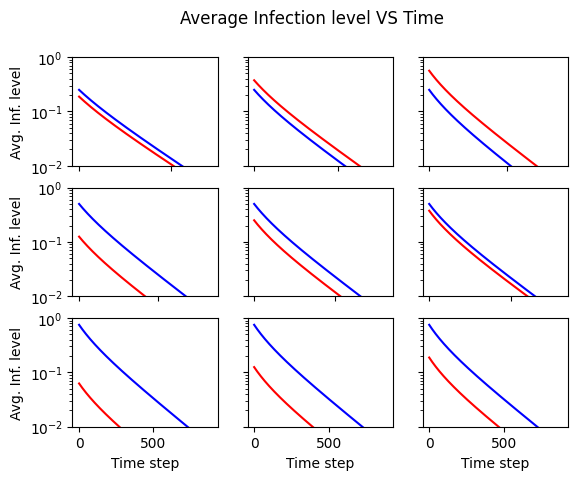

In [20]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')

All assumptions satisfied
Converged at iteration 843
All assumptions satisfied
Converged at iteration 825
All assumptions satisfied
Converged at iteration 850
All assumptions satisfied
Converged at iteration 808
All assumptions satisfied
Converged at iteration 787
All assumptions satisfied
Converged at iteration 811
All assumptions satisfied
Converged at iteration 803
All assumptions satisfied
Converged at iteration 802
All assumptions satisfied
Converged at iteration 777


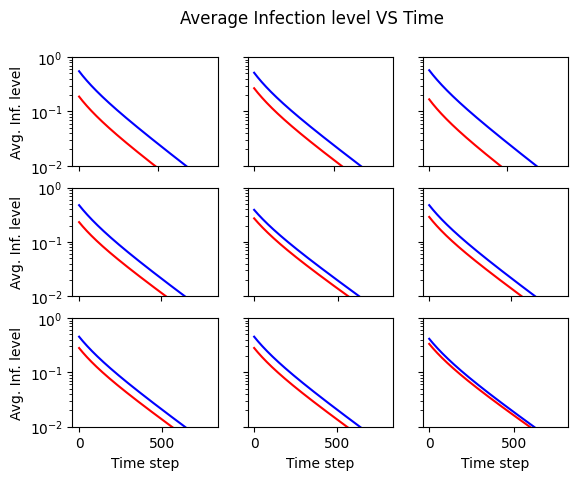

In [21]:
# Completely random initializations
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')

Let us examine the equilibrium to check if it is close to the DFE $(0, 0)$

In [23]:
x1_bar = [x1_avg_histories[i][-1] for i in range(len(x1_avg_histories))]
print(x1_bar)
print("average of equilibria of virus 1 across 9 simulations, should be very close to zero(virus 1 dies out):", np.mean(x1_bar))
print("variance of equilibria of virus 1 across 9 simulations: ", np.var(x1_bar), "\n")

x2_bar = [x2_avg_histories[i][-1] for i in range(len(x2_avg_histories))]
print(x2_bar)
print("average of equilibria of virus 2 across 9 simulations, should be very close to zero(virus 2 dies out):", np.mean(x2_bar))
print("variance of equilibria of virus 2 across 9 simulations: ", np.var(x2_bar))

[np.float64(0.004278687515604889), np.float64(0.004284565693799101), np.float64(0.0042761248905274175), np.float64(0.00426444945144013), np.float64(0.004272367424234701), np.float64(0.004279039009214139), np.float64(0.004280466226846423), np.float64(0.00427983005444572), np.float64(0.004247945681661333)]
average of equilibria of virus 1 across 9 simulations, should be very close to zero(virus 1 dies out): 0.00427371954975265
variance of equilibria of virus 1 across 9 simulations:  1.1236811117010327e-10 

[np.float64(0.0015712014659117139), np.float64(0.0023638579284485433), np.float64(0.0013229177156987655), np.float64(0.002399633520490089), np.float64(0.0031082066175185568), np.float64(0.0028568140970528662), np.float64(0.0029062961000864023), np.float64(0.002915209393620422), np.float64(0.0038017973303141675)]
average of equilibria of virus 2 across 9 simulations, should be very close to zero(virus 2 dies out): 0.0025828815743490583
variance of equilibria of virus 2 across 9 simulat